# regression logistique

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA

from sklearn.base import BaseEstimator, MetaEstimatorMixin

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.utils import check_X_y
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

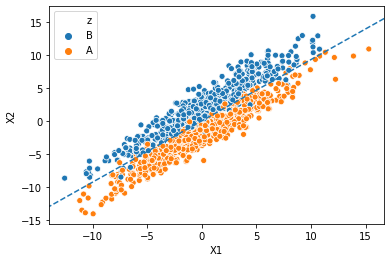

In [45]:
Xy = pd.read_csv("data/SynthPara_n1000_p2.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
sk_cls = LogisticRegression(penalty="none")
sk_cls.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
add_decision_boundary(sk_cls)
plt.show()


In [11]:
cls.coef_

array([[-2.07771425,  2.23897111]])

In [12]:
cls.intercept_

array([-0.00339858])

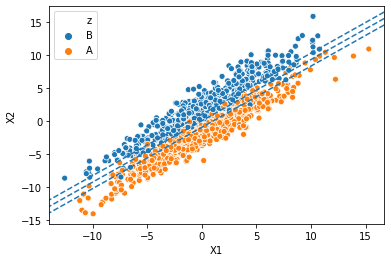

In [15]:
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
from scipy.special import logit
levels = logit(np.array([.1, .5, .9]))
add_decision_boundary(cls, levels=levels)
plt.show()

In [25]:
Xy = pd.read_csv("data/SynthPara_n1000_p2.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
poly = PolynomialFeatures(degree=2)
X_p = poly.fit_transform(X)
cls = LogisticRegression()
cls.fit(X_p, y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

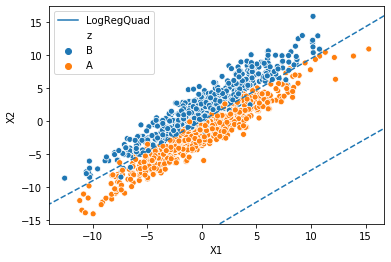

In [6]:
Xy = pd.read_csv("data/SynthPara_n1000_p2.csv")
X = Xy.iloc[:, :-1]
y = Xy.iloc[:, -1]
poly = PolynomialFeatures(degree=2)
cls = LogisticRegression()
pipe = make_pipeline(poly, cls)
pipe.fit(X, y)
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
add_decision_bounda<
ry(pipe, label="LogRegQuad")
plt.show()

In [27]:
cls = LogisticRegressionDIY()
cls.fit(X, y)
np.isclose(sk_cls.coef_, cls.coef_)

array([[ True,  True]])

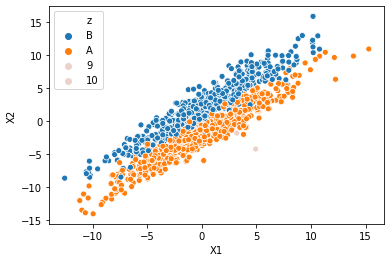

In [49]:
from sklearn.cluster import KMeans
cls = KMeans(n_clusters=20)
cls.fit(X)
centers = cls.cluster_centers_
sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
sns.scatterplot(centers[0], centers[1], hue=10)

In [50]:
from sklearn.metrics import pairwise_distances
Y = pairwise_distances(X, centers)
Y.shape

(1000, 20)

In [63]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import pairwise_distances

def distances_to_centers(centers, metric="euclidean"):
    def distances_to_centers0(X):
        # Calcul des inter-distances entre `X` et `centers`
        return pairwise_distances(X, centers, metric=metric)
    return distances_to_centers0
# Fonction qui prend en argument un jeu de données et le transforme.
func = distances_to_centers(centers)
# Création d'un modèle Scikit-learn qui réalise la transformation
# voulue.
transformer = FunctionTransformer(func)


In [57]:
classes_, y = np.unique(y, return_inverse=True)

AttributeError: 'LogisticRegression' object has no attribute 'classes_'

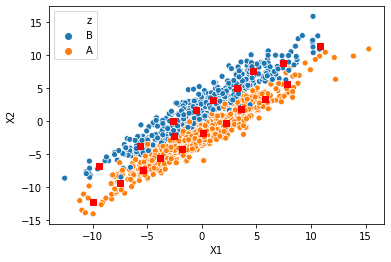

In [67]:
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(transformer, LogisticRegression())
ax = sns.scatterplot(x="X1", y="X2", hue="z", data=Xy)
plt.scatter(*centers.T, marker="s", c="r")
add_decision_boundary(pipe)
plt.show()


In [65]:
pipe.fit(X, y)


/home/yunfei/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('functiontransformer',
                 FunctionTransformer(accept_sparse=False, check_inverse=True,
                                     func=<function distances_to_centers.<locals>.distances_to_centers0 at 0x7fcda3321c20>,
                                     inv_kw_args=None, inverse_func=None,
                                     kw_args=None, validate=False)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [24]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.linear_model._base import LinearClassifierMixin
from sklearn.utils import check_X_y

# La fonction logistique
from scipy.special import expit


# On hérite de `LinearClassifierMixin` qui gère toute la partie
# prédiction pourvu qu'on renseigne les attributs `coef_`,
# `intercept_` et `classes_` lors de l'apprentissage.
class LogisticRegressionDIY(BaseEstimator, LinearClassifierMixin):
    def __init__(self, max_iter=1000, tol=1e-5, fit_intercept=True):
        self.max_iter = max_iter
        self.tol = tol
        self.fit_intercept = fit_intercept

    def fit(self, X, y):
        # On valide `X` et `y` en transformant par exemple les
        # DataFrame ou Series Pandas en tableau Numpy
        X, y = check_X_y(X, y)

        # On définit les classes qui ne sont pas nécessairement les
        # entiers 0 et 1. On convertit les classes de `y` en des
        # entiers.
        self.classes_, y = np.unique(y, return_inverse=True)

        # On rajoute une colonne de "1" si on veut apprendre une
        # constante
        p = X.shape[1]
        if self.fit_intercept:
            p += 1
            X = np.column_stack((np.ones(X.shape[0]), X))

        it = 1
        step = self.tol + 1
        beta = np.zeros(p)

        while np.linalg.norm(step) > self.tol and it < self.max_iter:
            # Calcul des p_i avec la fonction logistique
            pi = expit(X @ beta)
            W = np.diag(pi * (1 - pi))
            # Calcul du gradient
            grad = X.T @ (y - pi)

            # Calcul de la matrice hessienne
            hessian = -X.T @ W @ X

            # Calcul de l'incrément avec `np.linalg.solve` ou
            # `np.linalg.inv`.
            step = -np.linalg.solve(hessian, grad)

            # Mis à jour de beta
            beta += step

            it += 1

        # Stockage des paramètres appris. Attention, pour que la
        # prédiction avec la fonction `predict` marche, il faut que
        # l'attribut `coef_` soit une matrice ligne. De même,
        # l'attribut `intercept_` même si c'est un scalaire doit être
        # mis dans un tableau. Il faut également tenir compte de
        # l'option `fit_intercept`.
        self.coef_ = beta[None, 1:] if self.fit_intercept else beta[None, :]
        self.intercept_ = beta[[0]] if self.fit_intercept else np.array([0])


In [3]:
def scatterplot_pca(
    columns=None, hue=None, style=None, data=None, pc1=1, pc2=2, **kwargs
):
    """
    Utilise `sns.scatterplot` en appliquant d'abord une ACP si besoin
    pour réduire la dimension.
    """

    # Select columns (should be numeric)
    data_quant = data if columns is None else data[columns]
    data_quant = data_quant.drop(
        columns=[e for e in [hue, style] if e is not None], errors="ignore"
    )

    # Reduce to two dimensions
    if data_quant.shape[1] == 2:
        data_pca = data_quant
        pca = None
    else:
        n_components = max(pc1, pc2)
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_quant)
        data_pca = pd.DataFrame(
            data_pca[:, [pc1 - 1, pc2 - 1]], columns=[f"PC{pc1}", f"PC{pc2}"]
        )

    # Keep name, force categorical data for hue and steal index to
    # avoid unwanted alignment
    if isinstance(hue, pd.Series):
        if not hue.name:
            hue.name = "hue"
        hue_name = hue.name
    elif isinstance(hue, str):
        hue_name = hue
        hue = data[hue]
    elif isinstance(hue, np.ndarray):
        hue = pd.Series(hue, name="class")
        hue_name = "class"

    hue = hue.astype("category")
    hue.index = data_pca.index
    hue.name = hue_name

    if isinstance(style, pd.Series):
        if not style.name:
            style.name = "style"
        style_name = style.name
    elif isinstance(style, str):
        style_name = style
        style = data[style]
    elif isinstance(style, np.ndarray):
        style = pd.Series(style, name="style")
        style_name = "style"

    sp_kwargs = {}
    full_data = data_pca
    if hue is not None:
        full_data = pd.concat((full_data, hue), axis=1)
        sp_kwargs["hue"] = hue_name
    if style is not None:
        full_data = pd.concat((full_data, style), axis=1)
        sp_kwargs["style"] = style_name

    x, y = data_pca.columns
    ax = sns.scatterplot(x=x, y=y, data=full_data, **sp_kwargs)

    return ax, pca


def plot_clustering(data, clus1, clus2=None, ax=None, **kwargs):
    """Affiche les données `data` dans le premier plan principal.
    """

    if ax is None:
        ax = plt.gca()

    other_kwargs = {e: kwargs.pop(e) for e in ["centers", "covars"] if e in kwargs}

    ax, pca = scatterplot_pca(data=data, hue=clus1, style=clus2, ax=ax, **kwargs)

    if "centers" in other_kwargs and "covars" in other_kwargs:
        # Hack to get colors
        # TODO use legend_out = True
        levels = [str(l) for l in np.unique(clus1)]
        hdls, labels = ax.get_legend_handles_labels()
        colors = [
            artist.get_facecolor().ravel()
            for artist, label in zip(hdls, labels)
            if label in levels
        ]
        colors = colors[: len(levels)]

        if data.shape[1] == 2:
            centers_2D = other_kwargs["centers"]
            covars_2D = other_kwargs["covars"]
        else:
            centers_2D = pca.transform(other_kwargs["centers"])
            covars_2D = [
                pca.components_ @ c @ pca.components_.T for c in other_kwargs["covars"]
            ]

        p = 0.9
        sig = norm.ppf(p ** (1 / 2))

        for covar_2D, center_2D, color in zip(covars_2D, centers_2D, colors):
            v, w = linalg.eigh(covar_2D)
            v = 2.0 * sig * np.sqrt(v)

            u = w[0] / linalg.norm(w[0])
            if u[0] == 0:
                angle = np.pi / 2
            else:
                angle = np.arctan(u[1] / u[0])

            angle = 180.0 * angle / np.pi  # convert to degrees
            ell = mpl.patches.Ellipse(center_2D, v[0], v[1], 180.0 + angle, color=color)
            ell.set_clip_box(ax.bbox)
            ell.set_alpha(0.5)
            ax.add_artist(ell)

    return ax, pca


def add_decision_boundary(model, levels=None, resolution=1000, ax=None, label=None):
    """Trace une frontière de décision sur une figure existante.

    La fonction utilise `model` pour prédire un score ou une classe
    sur une grille de taille `resolution`x`resolution`. Une (ou
    plusieurs frontières) sont ensuite tracées d'après le paramètre
    `levels` qui fixe la valeur des lignes de niveaux recherchées.

    """

    if ax is None:
        ax = plt.gca()


    if isinstance(model, MetaEstimatorMixin):
        return add_decision_boundary(model.best_estimator_, levels=levels, resolution=resolution, ax=ax, label=label)

    elif callable(model):
        if levels is None:
            levels = [0]
        def predict(X):
            return model(X)

    elif isinstance(model, BaseEstimator):
        n_classes = len(model.classes_)
        if "decision_function" in dir(model):
            if n_classes == 2:
                if levels is None:
                    levels = [0]
                def predict(X):
                    return model.decision_function(X)
        else:
            levels = np.arange(n_classes - 1) + .5
            def predict(X):
                pred = model.predict(X)
                _, idxs = np.unique(pred, return_inverse=True)
                return idxs
    else:
        raise Exception("Modèle pas supporté")


    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = predict(xy).reshape(XX.shape)

    scout, = ax.plot([], [], linestyle="dashed")
    orig_color = scout.get_color()
    sns.lineplot([0], [0], label=label, ax=ax, color=orig_color, linestyle="dashed")

    ax.contour(
        XX,
        YY,
        Z,
        levels=levels,
        colors=orig_color,
        linestyles="dashed",
        antialiased=True,
    )
